## ENV SETUP

1. Install uv (or do it you're own way)
2. Run `uv sync`
3. Run `source .venv/bin/activate`

You're good to go.

# Instructions

The Task : Create the best CadQuery code generator model. 

1. Load the dataset (147K pairs of Images/CadQuery code).
2. Create a baseline model and evaluate it with the given metrics.
3. Enhance by any manner the baseline model and evaluate it again.
4. Explain you choices and possible bottlenecks. 
5. Show what enhancements you would have done if you had more time.

You can do *WHATEVER* you want, be creative, result is not what matters the most. 
Creating new model architectures, reusing ones you used in the past, fine-tuning, etc...

If you are GPU poor, there are solutions. Absolute value is not what matters, relative value between baseline and enhanced model is what matters.

In [3]:
from datasets import load_dataset
ds = load_dataset("CADCODER/GenCAD-Code", num_proc=16, split=["train", "test"], cache_dir="/Volumes/BIG-DATA/HUGGINGFACE_CACHE")

c:\Users\zeine\Documents\mecagent-technical-test\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset exploration

In [4]:
ds[0][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=448x448>,
 'deepcad_id': '0000/00006371',
 'cadquery': 'import cadquery as cq\n# Generating a workplane for sketch 0\nwp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.015625, -0.0078125, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))\nloop0=wp_sketch0.moveTo(0.0, 0.0).threePointArc((0.0007948582418457166, -0.0019189575476279677), (0.0027138157894736844, -0.0027138157894736844)).lineTo(0.021217105263157895, -0.0027138157894736844).threePointArc((0.022787161438489866, -0.00206347722796355), (0.0234375, -0.000493421052631579)).lineTo(0.0234375, 0.018256578947368422).threePointArc((0.02283825686147997, 0.019949990385858287), (0.021217105263157895, 0.020723684210526318)).lineTo(0.0022203947368421052, 0.020723684210526318).threePointArc((0.0005992431385200307, 0.019949990385858287), (0.0, 0.018256578947368422)).lineTo(0.0, 0.0).close()\nsolid0=wp_sketch0.add(loop0).extrude(0.75)\nsolid=solid0\n',
 'token_count': 1292,


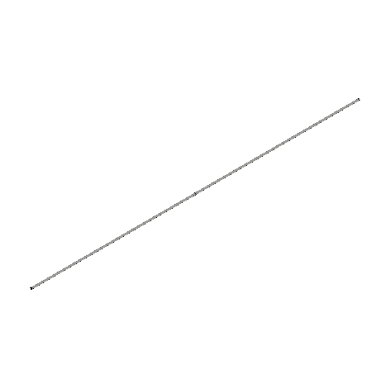

CadQuery code:
 import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, 0.0, 0.0), cq.Vector(1.0, 6.123233995736766e-17, -6.123233995736766e-17), cq.Vector(6.123233995736766e-17, -1.0, 6.123233995736766e-17)))
loop0=wp_sketch0.moveTo(0.003947368421052632, 0.0).circle(0.0038651315789473683)
solid0=wp_sketch0.add(loop0).extrude(0.75, both=True)
solid=solid0



In [5]:
import matplotlib.pyplot as plt

sample = ds[0][7003]  # First sample in train set

img = sample['image']
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

print("CadQuery code:\n", sample['cadquery'])

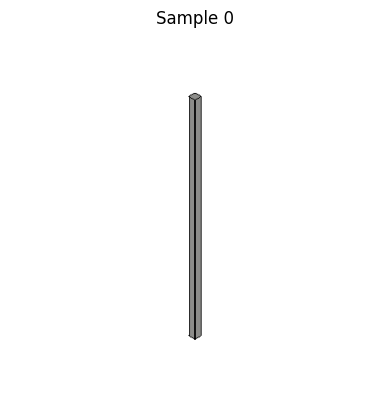

Sample 0 CadQuery code:
import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.015625, -0.0078125, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))
loop0=wp_sketch0.moveTo(0.0, 0.0).threePointArc((0.0007948582418457166, -0.0019189575476279677), (0.0027138157894736844, -0.0027138157894736844)).lineTo(0.021217105263157895, -0.0027138157894736844).threePointArc((0.022787161438489866, -0.00206347722796355), (0.0234375, -0.000493421052631579)).lineTo(0.0234375, 0.018256578947368422).threePointArc((0.02283825686147997, 0.019949990385858287), (0.021217105263157895, 0.020723684210526318)).lineTo(0.0022203947368421052, 0.020723684210526318).threePointArc((0.0005992431385200307, 0.019949990385858287), (0.0, 0.018256578947368422)).lineTo(0.0, 0.0).close()
solid0=wp_sketch0.add(loop0).extrude(0.75)
solid=solid0


Prompt: Generate the CADQuery code needed to create the CAD for the provided image. Just the code, no other words.
Token cou

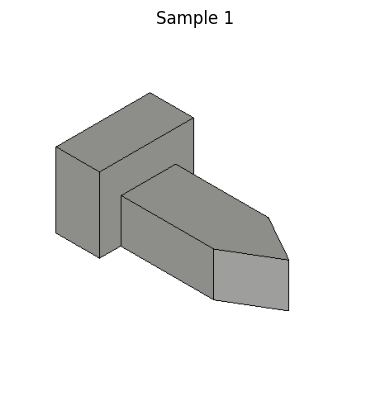

Sample 1 CadQuery code:
import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, -0.1953125, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))
loop0=wp_sketch0.moveTo(0.17730263157894738, 0.0).lineTo(0.17730263157894738, 0.38281250000000006).lineTo(0.0, 0.38281250000000006).lineTo(0.0, 0.0).close()
solid0=wp_sketch0.add(loop0).extrude(0.3046875)
solid=solid0
# Generating a workplane for sketch 1
wp_sketch1 = cq.Workplane(cq.Plane(cq.Vector(0.1796875, -0.109375, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))
loop1=wp_sketch1.moveTo(0.3782072368421052, 0.0).lineTo(0.5703125, 0.1140625).lineTo(0.3782072368421052, 0.22212171052631577).lineTo(0.0, 0.22212171052631577).lineTo(0.0, 0.0).close()
solid1=wp_sketch1.add(loop1).extrude(0.1796875)
solid=solid.union(solid1)


Prompt: Generate the CADQuery code needed to create the CAD for the provided image. Just the code, no other words.
Token count: 1195
--------------------

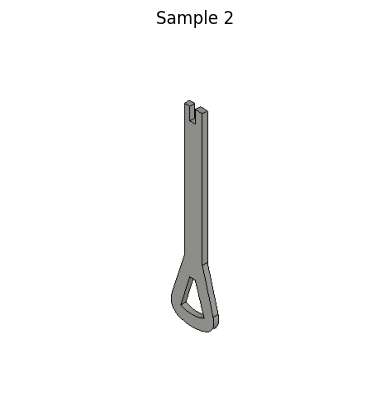

Sample 2 CadQuery code:
import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.1015625, 0.0, -0.046875), cq.Vector(1.0, 6.123233995736766e-17, -6.123233995736766e-17), cq.Vector(6.123233995736766e-17, -1.0, 6.123233995736766e-17)))
loop0=wp_sketch0.moveTo(0.0, 0.0).threePointArc((0.0019490941863378162, -0.04433658679437616), (0.03355263157894737, -0.07549342105263158)).threePointArc((0.09646381578947369, -0.08720656501962193), (0.159375, -0.07549342105263158)).threePointArc((0.19097853739260956, -0.044336586794376284), (0.19292763157894738, 0.0)).lineTo(0.14259868421052632, 0.18453947368421053).lineTo(0.14259868421052632, 0.796875).lineTo(0.10904605263157895, 0.796875).lineTo(0.10904605263157895, 0.7381578947368421).lineTo(0.08388157894736842, 0.7381578947368421).lineTo(0.08388157894736842, 0.796875).lineTo(0.0587171052631579, 0.796875).lineTo(0.0587171052631579, 0.18453947368421053).lineTo(0.0, 0.0).close()
loop1=wp_sketch0.moveTo(0

In [6]:
import numpy as np

# Number of samples to inspect
num_samples = 3

for i in range(num_samples):
    sample = ds[0][i]

    # Display image
    img = sample['image']
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"Sample {i}")
    plt.show()

    # Print CadQuery code and other fields
    print(f"Sample {i} CadQuery code:\n{sample['cadquery']}\n")
    if 'prompt' in sample:
        print(f"Prompt: {sample['prompt']}")
    if 'token_count' in sample:
        print(f"Token count: {sample['token_count']}")
    print('-' * 60)

# Model suggestion

In [1]:
# Charge datasets
import dataset_new
from torch.utils.data import DataLoader

print("loading training datasets...")
dataset = dataset_new.CadQueryDataset(ds[0])

loading training datasets...


NameError: name 'ds' is not defined

In [1]:
from dataset_new import split_dataset
training_dataset, val_dataset, testing_dataset = split_dataset(dataset, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, seed=42)


OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "c:\Users\zeine\Documents\mecagent-technical-test\.venv\Lib\site-packages\torch\lib\cublas64_12.dll" or one of its dependencies.

In [38]:
training_loader = DataLoader(training_dataset, batch_size=256, shuffle=True)
testing_loader = DataLoader(testing_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=True)

In [39]:

from model_archi import SimpleImage2Text
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleImage2Text(training_dataset.vocab_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss(ignore_index=0)

print("Starting training...")
for epoch in range(2):  # Increase for real training
    model.train()
    for images, codes, _ in tqdm(training_loader):
        images, codes = images.to(device), codes.to(device)
        outputs = model(images, codes)
        loss = criterion(outputs.view(-1, training_dataset.vocab_size), codes.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch} Loss: {loss.item():.4f}")

c:\Users\zeine\Documents\mecagent-technical-test\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\zeine\Documents\mecagent-technical-test\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting training...


100%|██████████| 576/576 [1:05:45<00:00,  6.85s/it]


Epoch 0 Loss: 0.1681


100%|██████████| 576/576 [35:07<00:00,  3.66s/it]  


Epoch 1 Loss: 0.1656


In [44]:
model.eval()
with torch.no_grad():
    img, _, code_str = training_dataset[5]
    img = img.unsqueeze(0).to(device)
    outputs = model(img)
    pred_idx = outputs.argmax(dim=2).squeeze().cpu().numpy()
    pred_code = ''.join([training_dataset.idx2char.get(i, '') for i in pred_idx if i != 0])
    print(pred_code)
    print(f"code_str: {code_str}")

import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.75, 0.0, 0.0), cq.Vector(1.0, 6.123233995736766e-17, -6.123233995736766e-17), cq.Vector(6.123233995736766e-17, -1.0, 6.123233995736766e-17)))
loop0=wp_sketch0.moveTo(0.7578947368421053, 0.0).circle(0.7578947368421053)
loop1=wp_sketch0.moveTo(0.7578947368421053, 0.0).circle(0.7578947368421053)
loop1=wp_sketch0.moveTo(0.7578947368421053, 0.0).circle(0.7578947368421053)
loop1=wp_sketch0.moveTo(0.75789473
code_str: import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, -0.0390625, -0.15625), cq.Vector(3.749399456654644e-33, 1.0, -6.123233995736766e-17), cq.Vector(1.0, 0.0, 6.123233995736766e-17)))
loop0=wp_sketch0.moveTo(0.0352796052631579, 0.0).threePointArc((0.03754746418308187, 0.0009393779221812848), (0.03848684210526316, 0.003207236842105263)).lineTo(0.03848684210526316, 0.3014802631578947).threePointArc((0.03754746418308187

In [47]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

# Load pre-trained models
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    "google/vit-base-patch16-224-in21k",  # Vision Transformer encoder
    "T5"                                # GPT-2 decoder
)
feature_extractor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
tokenizer = AutoTokenizer.from_pretrained("T5")

# Prepare image
img = sample['image']  # PIL Image
pixel_values = feature_extractor(images=img, return_tensors="pt").pixel_values

# Generate code
model.eval()
with torch.no_grad():
    output_ids = model.generate(pixel_values, max_length=256)
    pred_code = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(pred_code)

OSError: T5 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

## Evaluation Metrics

1. Valid Syntax Rate metric assess the validity of the code by executing and checking if error are returned.
2. Best IOU assess the similarity between the meshes generated by the code.

In [2]:
from metrics.valid_syntax_rate import evaluate_syntax_rate_simple
from metrics.best_iou import get_iou_best

In [3]:
## Example usage of the metrics
sample_code = """
height = 60.0
width = 80.0
thickness = 10.0
diameter = 22.0

# make the base
result = (
    cq.Workplane("XY")
    .box(height, width, thickness)
)
"""

sample_code_2 = """
 height = 60.0
 width = 80.0
 thickness = 10.0
 diameter = 22.0
 padding = 12.0

 # make the base
 result = (
     cq.Workplane("XY")
     .box(height, width, thickness)
     .faces(">Z")
     .workplane()
     .hole(diameter)
     .faces(">Z")
     .workplane()
     .rect(height - padding, width - padding, forConstruction=True)
     .vertices()
     .cboreHole(2.4, 4.4, 2.1)
 )
"""
codes = {
    "sample_code": sample_code,
    "sample_code_2": sample_code_2,
}
vsr = evaluate_syntax_rate_simple(codes)
print("Valid Syntax Rate:", vsr)
iou = get_iou_best(sample_code, sample_code_2)
print("IOU:", iou)

Valid Syntax Rate: 1.0
IOU: 0.5834943417057687


## Have Fun